<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/Esercitazione_18_06_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parte 1: Analisi (10 punti)
1. Quante sono le istanze contenute nel dataset? _____ Il dataset è completo (cioè per ogni istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono “missing values”)? _____  Il dataset è bilanciato per quanto riguarda la classe da predire? ______ (punti 1)
2. Verificare se i clienti con contratto a lungo termine (Contract="Two year") hanno in media una spesa mensile (MonthlyCharges) inferiore rispetto a quelli con contratti mensili o annuali. (punti 2)
3. Discretizzare tenure (anzianità del cliente) in 3 gruppi (bassa, media, alta). Creare una tabella pivot che mostri la percentuale di abbandono (Churn) per gruppo di anzianità e tipo di contratto. I clienti con anzianità bassa e contratto mensile hanno una probabilità maggiore di abbandonare? (punti 3)
4. Determinare se l’adozione di almeno un servizio extra (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) riduce il tasso di abbandono. (punti 2) Creare una nuova feature che conta il numero di servizi aggiuntivi attivi per cliente e verificare con un grafico se il tasso di abbandono diminuisce all’aumentare del numero di servizi attivi. (punti 2)


1. Quante sono le istanze contenute nel dataset? _____ Il dataset è completo (cioè per ogni istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono “missing values”)? _____  Il dataset è bilanciato per quanto riguarda la classe da predire? ______ (punti 1)

In [67]:
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv("dataset.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [69]:
df.shape

(7043, 21)

In [70]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [71]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


2. Verificare se i clienti con contratto a lungo termine (Contract="Two year") hanno in media una spesa mensile (MonthlyCharges) inferiore rispetto a quelli con contratti mensili o annuali. (punti 2)

In [72]:
#sol prof
df['Contract'].unique() #così verifico i valori delle feature

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [73]:
#posso raggruppare per tipo di contratto e vedere le medie delle feature
df.groupby('Contract')['MonthlyCharges'].mean()

,MonthlyCharges
Contract,
Month-to-month,66.398490
One year,65.048608
Two year,60.770413


In [74]:
#altra soluzione confronto solo breve con lungo termine (metto insieme i primi 2 gruppi in uno unico)->è quello che avevo fatto io ma più esplciito
a_lungo_termine = df[df['Contract'] == 'Two year']
a_breve_termine = df[df['Contract'] != 'Two year']

In [75]:
a_lungo_termine['MonthlyCharges'].mean()

np.float64(60.77041297935103)

In [76]:
a_breve_termine['MonthlyCharges'].mean()

np.float64(66.02669222139117)

In [77]:
#la mia sol era solo questa riga
if(df[(df['Contract'] == 'Two year')]['MonthlyCharges'].mean() <= df[(df['Contract'] != 'Two year')]['MonthlyCharges'].mean()):
  print("less") #->a breve termine quindi ha valore più alto monthly charges

less


3. Discretizzare tenure (anzianità del cliente) in 3 gruppi (bassa, media, alta). Creare una tabella pivot che mostri la percentuale di abbandono (Churn) per gruppo di anzianità e tipo di contratto. I clienti con anzianità bassa e contratto mensile hanno una probabilità maggiore di abbandonare? (punti 3)

In [78]:
df['tenure_cut'] = pd.cut(df['tenure'], bins=3,labels=['bassa','media','alta'])

In [79]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cut
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,bassa
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,media
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,bassa
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,media
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,bassa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,bassa
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,alta
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,bassa
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,bassa


In [80]:
#evitabile vedi sotto
def disc(abb):
  if abb == 'Yes':
    return 1
  else:
    return 0

In [81]:
#conviene convertire churn in numerico
#df['Churn'] = df['Churn'].map(disc) #prima soluzione mia passando per funzione esterna

df['Churn'] = df['Churn'].map({'Yes':1,'No':0}) #sol prof più compatta

In [82]:
pd.pivot_table(df,values='Churn',index='tenure_cut',columns='Contract',aggfunc='mean')

/tmp/ipython-input-353232884.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df,values='Churn',index='tenure_cut',columns='Contract',aggfunc='mean')


Contract,Month-to-month,One year,Two year
tenure_cut,,,
bassa,0.476748,0.090343,0.000000
media,0.329177,0.106178,0.021898
alta,0.260234,0.129338,0.033254


4. Determinare se l’adozione di almeno un servizio extra (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) riduce il tasso di abbandono. (punti 2) Creare una nuova feature che conta il numero di servizi aggiuntivi attivi per cliente e verificare con un grafico se il tasso di abbandono diminuisce all’aumentare del numero di servizi attivi. (punti 2)

In [83]:
df['StreamingTV'].unique() #sembra che tutte abbiamo yes-no-nointernetservices

array(['No', 'Yes', 'No internet service'], dtype=object)

In [84]:
#trasformo le colonne creando una lista con tutti i nomi di colonna
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
#voglio trasformarle in modo che yes venga tradotto con 1, no con 0, e no interentservice con 0

In [85]:
for col in cols:
  df[col] = df[col].map({'Yes' : 1, 'No' : 0, 'No internet service': 0} )


In [86]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cut
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,0,...,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0,bassa
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,1,...,0,0,0,One year,No,Mailed check,56.95,1889.5,0,media
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,1,...,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1,bassa
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,1,...,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0,media
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,0,...,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,bassa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,1,...,1,1,1,One year,Yes,Mailed check,84.80,1990.5,0,bassa
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,0,...,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,0,alta
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,1,...,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,0,bassa
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,0,...,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,1,bassa


In [87]:
#controllo se i clienti che hanno almeno uno dei servizi ha un tasso di abbandono più basso
df[(df['OnlineSecurity']==1) | (df['OnlineBackup'] == 1) | (df['DeviceProtection'] == 1) |
 (df['TechSupport'] == 1) | (df['StreamingTV'] == 1) | (df['StreamingMovies'] == 1) ]['Churn'].mean()


np.float64(0.28897180762852404)

In [88]:
#controllo se i clienti che non hanno nessuno dei servizi ha un tasso di abbandono più alto?
df[(df['OnlineSecurity']==0) & (df['OnlineBackup'] == 0) & (df['DeviceProtection'] == 0) &
 (df['TechSupport'] == 0) & (df['StreamingTV'] == 0) & (df['StreamingMovies'] == 0) ]['Churn'].mean()

np.float64(0.21406038756196485)

ci accorgiamo che con almeno un servizio sxtra c'è una percentuale un po' più alta di abbandono

Creare una nuova feature che conta il numero di servizi aggiuntivi attivi per cliente e verificare con un grafico se il tasso di abbandono diminuisce all’aumentare del numero di servizi attivi. (punti 2)

In [92]:
#le colonne dei servizi extra sono già state trasformate in 0/1 quindi comodo fare una somma. se per ogni clienti faccio somma delle colonne scopro il numero di servizi extra per cliente
#e la faccio diventare una nuova colonna
df['num_servizi_attivi'] = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].sum(axis=1)

In [93]:
#voglio ottenre un grafico che mi dice per ogni numero di servizi attivi (0/1/2.../5) un valore che mi indichi il tasso di abbandono
#raggruppo per numero di servizi e avrò per ciascun numero di servizi attivo il corrispondente tasso di abbandono
#in base a come sono messi i valori cerco di trovare una correlazione
df.groupby('num_servizi_attivi')['Churn'].mean()
#la media somma tutti i valori = 1 e divide per il totale di valori di ogni gruppo.

,Churn
num_servizi_attivi,
0,0.214060
1,0.457557
2,0.358180
3,0.273703
4,0.223005
5,0.124343
6,0.052817


<Axes: xlabel='num_servizi_attivi'>

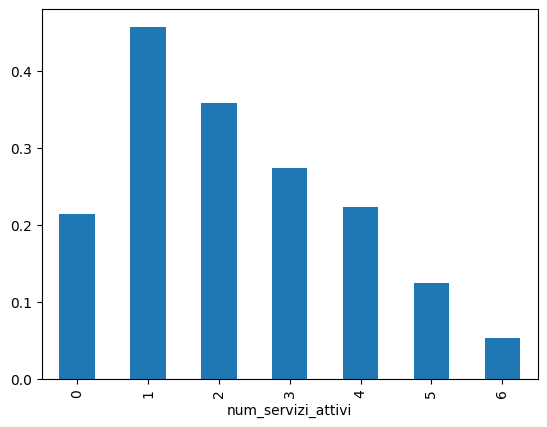

In [94]:
#per visualizzarlo si può usare molto semplicemente il plot di pandas
df.groupby('num_servizi_attivi')['Churn'].mean().plot(kind='bar')

per ogni gruppo ho ottenuto un raggruppamento sul numero di servizi e osserviamo il tasso di abbandono. osserviamo che questo è più alto solo quando c'è un servizio attivo e decresce all'aumentare del numero di servizi attivi. fa eccezione solo la barra del nessun servizio attivo

Parte 2: Trasformazione e Predizione (20 punti)
1. Si vuole predire l’abbandono dei clienti (Churn). Ricaricare il dataset originale, eliminare eventuali attributi inutili (giustificare la scelta) e istanze che contengono valori nulli, trasformare opportunamente valori categorici e dividere il dataset in 75% train e 25% test, preservando le proporzioni delle classi nella colonna target.
Confrontare la predizione ottenuta sia sul dataset train sia sul dataset test dai classificatori LogisticRegression, RandomForestClassifier e da un dummy classifier a scelta. Effettuare alcune considerazioni sui risultati ottenuti, tenendo in considerazione i valori di accuracy, F1 e della confusion matrix. (punti 4)

2. La predizione di RandomForestClassifier è influenzata dal genere? Valutare sui dati di test se la probabilità di abbandono calcolata sulle donne è la stessa per gli uomini (punti 2). Valutare se l’accuratezza di predizione ottenuta negli uomini è la stessa ottenuta nelle donne (punti 2). Eliminare l’attributo gender e valutare se l’accuratezza ottenuta negli uomini è la stessa ottenuta nelle donne (punti 1).

3. A partire dal dataset utilizzato al punto 1, trovare i migliori parametri di max_depth e n_estimators in RandomForestClassifier. Come cambia l'F1-score? (punti 2)

4. A partire dal dataset originale, dopo aver applicato un Label Encoder alle feature categoriche, considerare le 5 feature più correlate (positivamente o negativamente) a Churn e verificare se la predizione di RandomForestClassifier migliora. (punti 3)

5. Creare una pipeline che, a partire dal dataset originale, discretizza MonthlyCharges in 5 gruppi, applica OneHotEncoder alle variabili categoriche e usa StandardScaler sulle variabili numeriche. Applicare il RandomForestClassifier con i valori migliori dei parametri analizzati nel punto 3 e confrontare i risultati. (punti 3)

6. Aggiungere alla pipeline del punto 5 la funzione SelectKBest. Utilizzare la funzione di gridSearchCV per selezionare il K migliore e anche i valori migliori dei parametri max_depth e n_estimators di RandomForestClassifier (scegliere a piacere alcuni valori). (punti 3)

commenti sugli esercizi: -> da fare
- ricordati prima di fare il primo esercizio elimina la colonna customer id
- come vedere se random forest influenzato dal genere? devo controllare come il modello si comporta sulle donne e sugli uomini quindi andare a contare, soltanto nel test, quante volte il modello predice che ci sarà un abbandono nelle donne e negli uomini. le 2 percentuali devono essere vicine -> se sono diverse potrebbe voler dire che il modello ha un bias sul genere
- per l'ultima parte del esercizio 2 ricordati di eliminarlo sia dal training che dal test->occorre riallenare il modello
- il terzo esercizio mi chiede solo di fare un fine tuning degli iperparametri quindi un grid search, seleziono i valori per i 2 iperparametri (non selezionare troppi valori altrimenti tempi di esecuzione aumentano troppo)
- quarto esercizio richiede di fare feature importance quindi calcolare matrice correlazione delle feature e considerare un dataset considerato solo dalle 5 feature più correlate al target (positivamente e negativamente), dei valori di collrealzeione quindi prendo il valore assoluto. considero solo queste 5 feature (+ il target) e rialleno il modello e vedo come le performance di questo variano rispetto al punto precedente -> capisco se avere eliminato diverse feature e avnedo mantentuo solo quelle + correlate migliora le prestazione o meno.
- gli ultimi 2 esercizi sono delle semplici pipeline. la priam è un column trasnformer con 3 trasformatori diversi applicati a feature diverse, dove poi viene applicato il random forest
- l'ultima pipeline richiede di aggiungere alla pipeline del punto precednete la funzione selectkbest. non viene detto che bisogna fare un unione tra le feature del eselect k best e quelle del column transformer quindi aggiungo semplciemente nella pipline un altro step ovvero il select k best. metto dopo il column trasformer i lselect k best. poi utilizzo la grid search cross validation per fare fin tutining iperparametri (con dizionario fatto bene con i percorsi scritti bene in modo che siano indicati gli iperparametri corretti) e anche qui si applica il random forest classifier
